Mestrado em Modelagem Matematica da Informacao
----------------------------------------------
Disciplina: Modelagem e Mineracao de Dados
------------------------------------------

Master Program - Mathematical Modeling of Information
-----------------------------------------------------
Course: Data Mining and Modeling
--------------------------------

Professor: Renato Rocha Souza
-----------------------------  

Análise e Visualização de dados estruturados  
--------------------------------------------
Analizing and visualizing structured data  

Tópico/Topic: Gráficos de uma variável/Simple Univariate Graphs  
Tópico/Topic: Gráficos de duas variáveis/Two Variables Graphs

 Looking at data!  
 Simple Univariate Graphs: format and distribution  
 Dot and Jitter Plots  
 Histograms  
 Kernel Density Estimates  
 Cumulative Distribution Functions  
 Box and Whisker Plots  
Two Variables Graphs: establishing relationships  
 Scatter Plots (Diagramas de Dispersão)  
 Smoothing (Suavização)  
 Residuals  
 Logaritms  
 Regression  
 Correlation  

In [1]:
# import pylab as pl
from matplotlib import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import scipy.stats as ss
import scipy.signal as signal
import os
import codecs
import time
import datetime
#from numpy import loadtxt, genfromtxt, array, arange, subtract, linspace, concatenate, zeros_like, mean
#from matplotlib.pyplot import plot, scatter, boxplot, semilogx, semilogy, loglog, show, title, legend, figure
#from scipy import polyval, polyfit, sqrt, stats, randn
#from scipy.stats import linregress, describe, gaussian_kde, cumfreq
#from scipy.signal import gaussian, convolve, correlate
#from pylab import hist, movavg, datestr2num

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

#import seaborn as sns
import seaborn.apionly as sns
#sns.set(style="white", color_codes=True)

%matplotlib inline
#pylab.rcParams['figure.figsize'] = (8.0, 6.4)

Univariate Graphs
-----------------
- Where are the points?  
- How are they distributed?  
- What is the range of values?  
- Which are the typical, maximum and minimum values?  
- Are there clusters or trends?  
- Is the distribution symetrical?  
- Are there outliers?  
- Which features can be noted?  
- Are there descontinuities?  
- Are there unexpected values?  
- Can you identify known patterns?  

Specifying the path to the files:

In [2]:
datapath = "../datasets/"

Loading the datasets

http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html

In [3]:
#Loading datasets
dataset1 = "presidents.csv"
dataset2 = "serverdata.csv"
dataset3 = "glass.data.csv"
dataset4 = "allometricscaling.csv"
dataset5 = "draft_lottery.csv"
dataset6 = "sunspot_yearnum.dat"
dataset7 = "logscale.csv"
dataset8 = "marathon.csv"
dataset9 = "cotacoesbovespa.txt"
dataset10 = 'co2_mm_mlo.txt'

In [4]:
x = np.genfromtxt(os.path.join(datapath,dataset1), usecols=(2))
x_names = np.genfromtxt(os.path.join(datapath,dataset1), usecols=(1), dtype=(str))
y = np.loadtxt(os.path.join(datapath,dataset2))
z = np.loadtxt(os.path.join(datapath,dataset3), usecols=(1,2,10), delimiter=',')

In [5]:
x

array([  94.,   48.,   96.,   96.,   96.,   48.,   96.,   48.,    1.,
         47.,   48.,   16.,   32.,   48.,   48.,   49.,   47.,   96.,
         48.,    7.,   41.,   48.,   48.,   48.,   54.,   90.,   48.,
         96.,   29.,   67.,   48.,  146.,   92.,   96.,   34.,   62.,
         67.,   29.,   48.,   96.,   48.,   96.,   96.])

In [6]:
x_names

array(['Washington', 'Adams', 'Jefferson', 'Madison', 'Monroe', 'Adams',
       'Jackson', 'Van_Buren', 'Harrison', 'Tyler', 'Polk', 'Taylor',
       'Filmore', 'Pierce', 'Buchanan', 'Lincoln', 'Johnson', 'Grant',
       'Hayes', 'Garfield', 'Arthur', 'Cleveland', 'Harrison', 'Cleveland',
       'McKinley', 'Roosevelt', 'Taft', 'Wilson', 'Harding', 'Coolidge',
       'Hoover', 'Roosevelt', 'Truman', 'Eisenhower', 'Kennedy', 'Johnson',
       'Nixon', 'Ford', 'Carter', 'Reagan', 'Bush', 'Clinton', 'Bush'], 
      dtype='<U10')

Gathering some information on the datasets:

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html



In [7]:
print(ss.describe(y))
#print(ss.describe(z))

DescribeResult(nobs=1000, minmax=(44.5, 2985.29), mean=849.18857000000003, variance=456853.18439645151, skewness=1.3048517528837618, kurtosis=1.0261430787200698)


Usando uma série do Pandas  
http://pandas.pydata.org/

In [8]:
df_y = pd.Series(y)
df_y.describe()

count    1000.000000
mean      849.188570
std       675.909154
min        44.500000
25%       347.265000
50%       630.940000
75%      1125.880000
max      2985.290000
dtype: float64

Jitter Plots

http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.plot

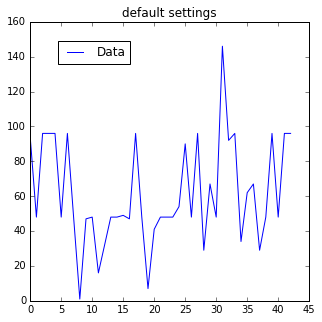

In [9]:
plt.figure(figsize=(5,5))
plt.plot(x)
plt.title('default settings')
plt.legend(('Data',), loc=(0.1,0.85), fontsize=12)
plt.show()

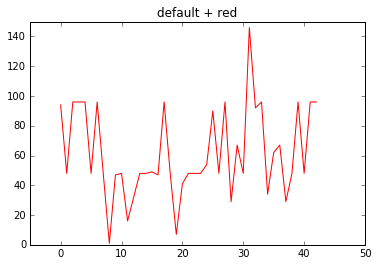

In [10]:
plt.plot(x,'r')
plt.title('default + red')
P = plt.gca()
P.axis([-5.0,50.0,0.0,150.0])
plt.show()

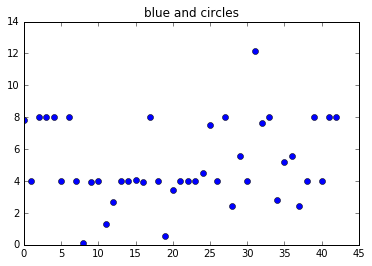

In [11]:
xyear = x/12.
plt.plot(xyear,'bo')
plt.title('blue and circles')
plt.show()

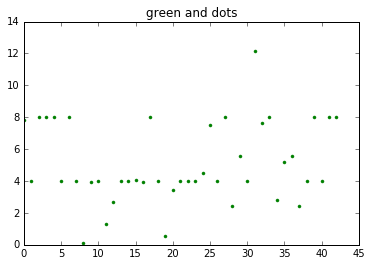

In [12]:
plt.plot(xyear,'g.')
plt.title('green and dots')
plt.show()

Histograms

http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.hist

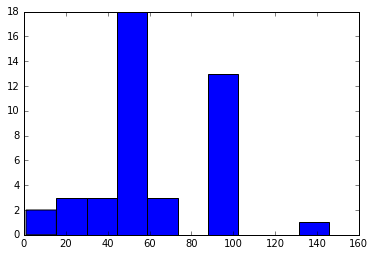

In [13]:
nbins=10
plt.hist(x, bins=nbins)
plt.show()

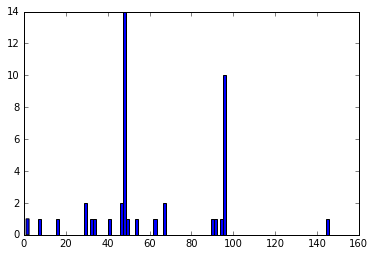

In [14]:
plt.hist(x, bins=10*nbins)
plt.show()

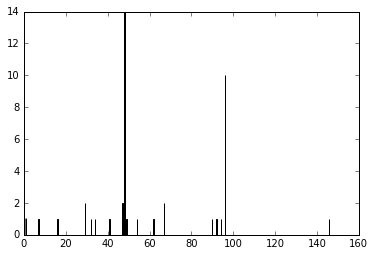

In [15]:
plt.hist(x, bins=100*nbins)
plt.show()

Kernel Density Estimates
------------------------
http://en.wikipedia.org/wiki/Kernel_density_estimation  
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

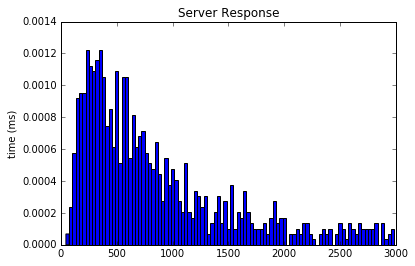

In [16]:
nbins=100
plt.hist(y, bins=nbins, normed=True, align='mid')
plt.title('Server Response')
plt.ylabel('time (ms)')
plt.show()

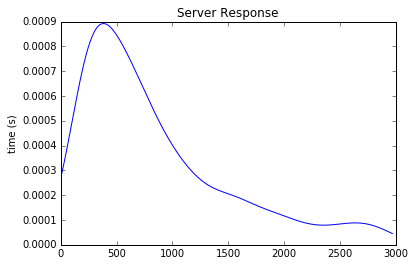

In [17]:
gkde = ss.gaussian_kde(y)
plt.plot(np.arange(0,(1.01*(max(y)-min(y))),.1), gkde.evaluate(np.arange(0,(1.01*(max(y)-min(y))),.1)))
plt.title('Server Response')
plt.ylabel('time (s)')
plt.show()

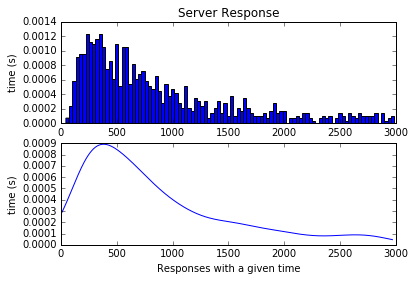

In [18]:
plt.subplot(2, 1, 1)
nbins=100
plt.hist(y, bins=nbins, normed=True, align='mid')
plt.title('Server Response')
plt.ylabel('time (s)')

plt.subplot(2, 1, 2)
gkde = ss.gaussian_kde(y)
plt.plot(np.arange(0,(1.01*(max(y)-min(y))),.1), gkde.evaluate(np.arange(0,(1.01*(max(y)-min(y))),.1)))   
plt.xlabel('Responses with a given time')
plt.ylabel('time (s)')

plt.show()

Cumulative Frequency
--------------------
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cumfreq.html#scipy.stats.cumfreq

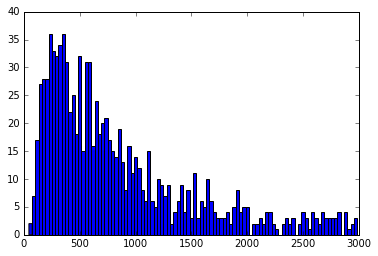

In [19]:
nbins=100
plt.hist(y, bins=nbins, normed=False, align='mid')
plt.show()

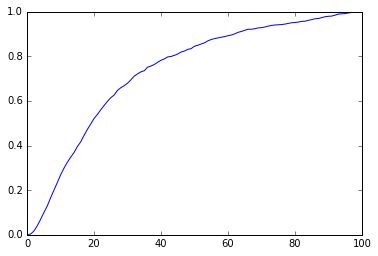

In [20]:
disc = ss.cumfreq(y, numbins=nbins)
plt.plot(disc[0]/len(y))
plt.show()

Box and Whisker Plots
---------------------
http://en.wikipedia.org/wiki/Box_plot  
http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.boxplot

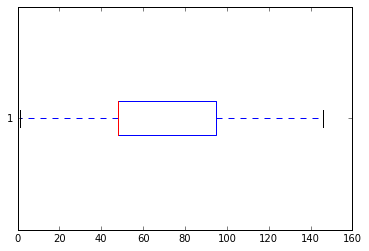

In [21]:
plt.boxplot(x, notch=0, sym='+', vert=0, whis=1.5, positions=None, widths=None)
plt.show()

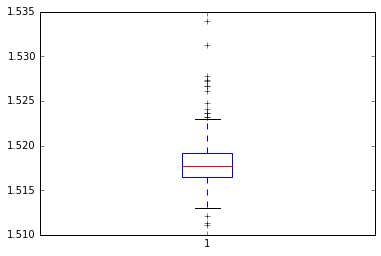

In [22]:
plt.boxplot(z[:,0], notch=0, sym='+', vert=1, whis=1.5, positions=None, widths=None)
plt.show()

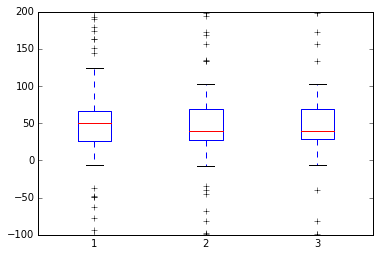

In [23]:
spread= pl.rand(50) * 100
center = np.ones(25) * 50
flier_high = pl.rand(10) * 100 + 100
flier_low = pl.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)
spread= pl.rand(50) * 100
center = np.ones(25) * 40
flier_high = pl.rand(10) * 100 + 100
flier_low = pl.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0 )
data.shape = (-1, 1)
d2.shape = (-1, 1)
#data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2,0]]

plt.boxplot(data)
plt.show()

Two variable graphs
-------------------

Association and Causality  
Dependency and Independency  
Correlation and Covariance

A special case of two variable graphs are the time series  
http://en.wikipedia.org/wiki/Time_series  

+ Trend (linear and non-linear)
+ Seasonality (adictive and multiplicative)  
+ Noise  
+ Other(!)  


Ex: Trend and seasonality in Mauna Loa CO2 emissions  
http://www.esrl.noaa.gov/gmd/ccgg/trends/#mlo_full

In [24]:
maunaloa = pd.read_csv(os.path.join(datapath,dataset10), 
                       comment='#', 
                       delim_whitespace=True, 
                       names=['year','month','decimal date','average','interpolated','trend','#days'],
                       index_col=2)
maunaloa.head()

,year,month,average,interpolated,trend,#days
decimal date,,,,,,
1958.208,1958,3,315.71,315.71,314.62,-1
1958.292,1958,4,317.45,317.45,315.29,-1
1958.375,1958,5,317.50,317.50,314.71,-1
1958.458,1958,6,-99.99,317.10,314.85,-1
1958.542,1958,7,315.86,315.86,314.98,-1


In [25]:
maunaloa.shape

(678, 6)

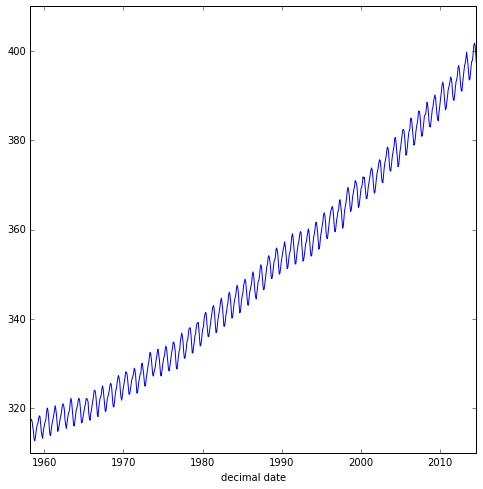

In [26]:
#maunaloa['average'].plot(figsize=(8,8))
maunaloa['interpolated'].plot(figsize=(8,8))

Scatter Plots
http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.scatter

In [27]:
sunspot = np.loadtxt(os.path.join(datapath,dataset6))
sunspot.shape

(386, 2)

In [28]:
sunspot[0:6,:]

array([[  1.61000000e+03,   0.00000000e+00],
       [  1.61100000e+03,   2.00000000e-01],
       [  1.61200000e+03,   1.50000000e+00],
       [  1.61300000e+03,   4.00000000e-01],
       [  1.61400000e+03,   0.00000000e+00],
       [  1.61500000e+03,   0.00000000e+00]])

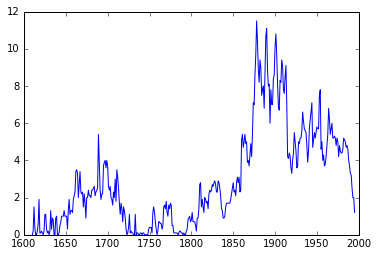

In [29]:
plt.plot(sunspot[:,0], sunspot[:,1])
plt.show()

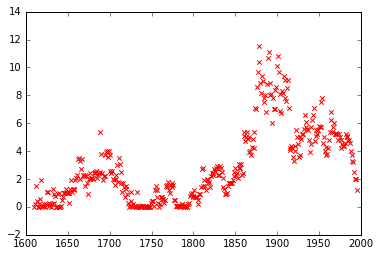

In [30]:
plt.scatter(sunspot[:,0], sunspot[:,1], c='r', marker='x')
plt.xlim(1600,2000)
plt.show()

Treating Logarithmic Data
-------------------------
http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.semilogx
    
http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.semilogy

http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.loglog

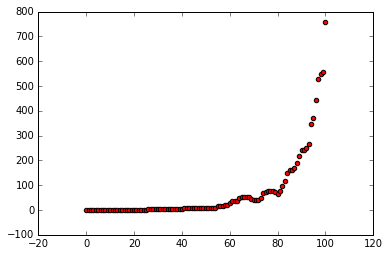

In [31]:
logexample = np.loadtxt(os.path.join(datapath,dataset7))
plt.scatter(logexample[:,0], logexample[:,1], c='r', marker = 'o')
plt.show()

In [32]:
allo = np.loadtxt(os.path.join(datapath,dataset4), usecols=(1,2), delimiter=',')
allo

array([[  9.00000000e+04,   6.00000000e+01],
       [  2.00000000e+03,   1.50000000e+02],
       [  5.00000000e+03,   9.00000000e+01],
       [  6.00000000e+01,   4.50000000e+02],
       [  1.50000000e+03,   2.75000000e+02],
       [  5.00000000e+03,   1.90000000e+02],
       [  1.20000000e+06,   4.40000000e+01],
       [  8.00000000e+05,   6.50000000e+01],
       [  1.50000000e+05,   7.00000000e+01],
       [  1.00000000e+03,   2.05000000e+02],
       [  5.00000000e+06,   3.00000000e+01],
       [  1.20000000e+08,   2.00000000e+01]])

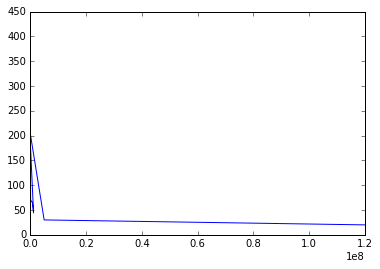

In [33]:
plt.plot(allo[:,0], allo[:,1])
plt.show()

In [34]:
#http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.describe.html
print(ss.describe(allo))

DescribeResult(nobs=12, minmax=(array([ 60.,  20.]), array([  1.20000000e+08,   4.50000000e+02])), mean=array([  1.06045467e+07,   1.37416667e+02]), variance=array([  1.18887579e+15,   1.60191742e+04]), skewness=array([ 3.00603781,  1.34277389]), kurtosis=array([ 7.0572155 ,  1.02788929]))


In [35]:
allo.shape

(12, 2)

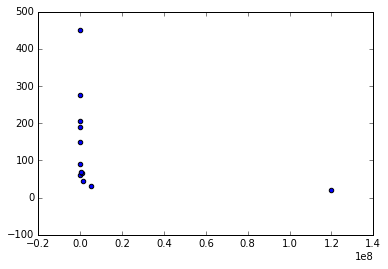

In [36]:
plt.scatter(allo[:,0], allo[:,1])
plt.show()

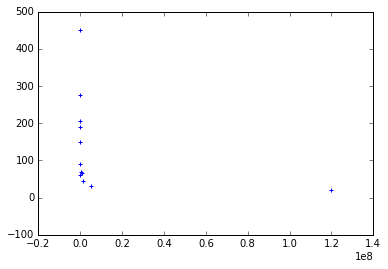

In [37]:
plt.scatter(allo[:,0], allo[:,1], c='b', marker='+')
plt.show()

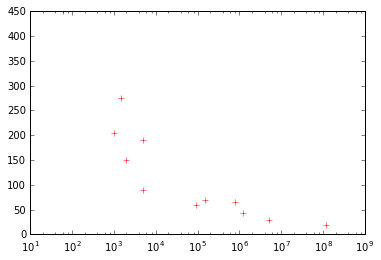

In [38]:
plt.semilogx(allo[:,0], allo[:,1], c='r', marker='+', ls='none')
plt.show()

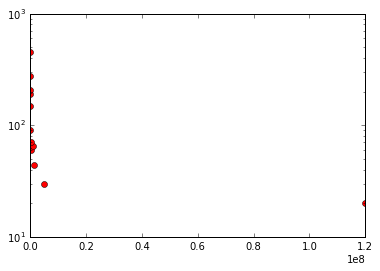

In [39]:
plt.semilogy(allo[:,0], allo[:,1], c='r', marker='o', ls='none')
plt.show()

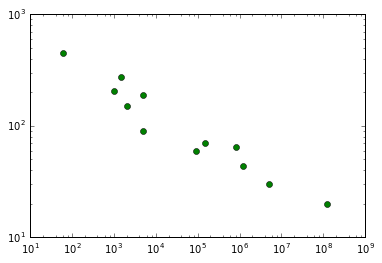

In [40]:
plt.loglog(allo[:,0], allo[:,1], c='g', marker='o', ls='none')
plt.show()

Smoothing with moving averages
------------------------------
http://matplotlib.sourceforge.net/api/mlab_api.html

In [41]:
lottery = np.loadtxt(os.path.join(datapath,dataset5),usecols=(3,4), skiprows=39)

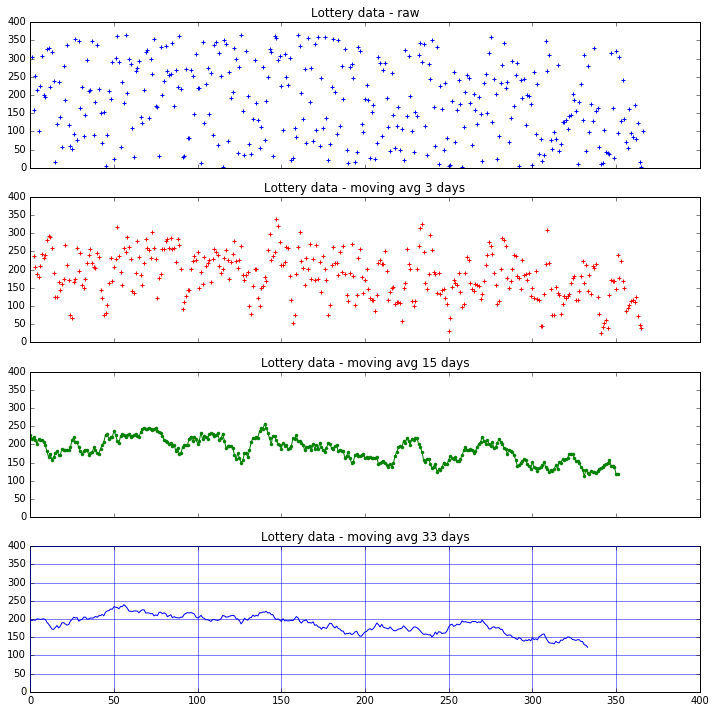

In [42]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(12,12), sharex=True, sharey=True)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
ax[0].scatter(lottery[:,0], lottery[:,1], c='b', marker='+')
ax[0].set_title('Lottery data - raw')
ax[1].scatter(lottery[1:-1,0], pl.movavg(lottery[:,1],3), c='r', marker='+')
ax[1].set_title('Lottery data - moving avg 3 days')
ax[2].plot(pl.movavg(lottery[:,1],15), c='g', marker='.')
ax[2].set_title('Lottery data - moving avg 15 days')
ax[3].plot(pl.movavg(lottery[:,1],33))
plt.grid(b=True, which='major', color='b', linestyle='-')
ax[3].set_title('Lottery data - moving avg 33 days')
#f.subplots_adjust(hspace=0)
plt.show()

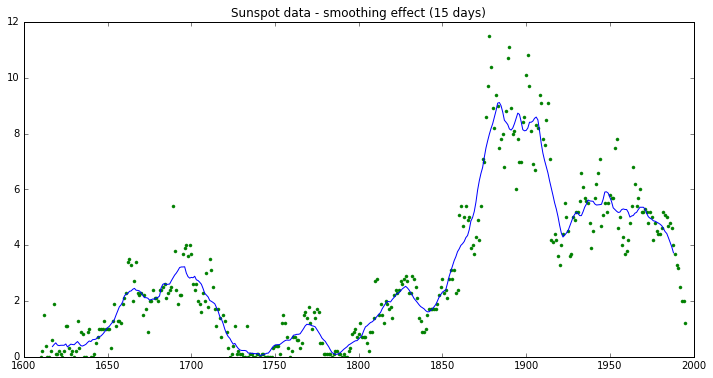

In [43]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(sunspot[:,0], sunspot[:,1], c='g', marker='.', ls='none')
ax.plot(sunspot[7:-7,0], pl.movavg(sunspot[:,1],15))
plt.title('Sunspot data - smoothing effect (15 days)')
plt.show()

Filtering - Residuals
---------------------

One way of finding patterns remaining in data after applying some smoothing technique is to subtract the smoothed data from the original data, and try to fing some residuals. If there are some, that means that our smoothing function didn't capture all the information from the original signal.
 
http://en.wikipedia.org/wiki/Errors_and_residuals_in_statistics  
http://docs.scipy.org/doc/numpy/reference/generated/numpy.subtract.html  
http://en.wikipedia.org/wiki/Filter_(signal_processing)

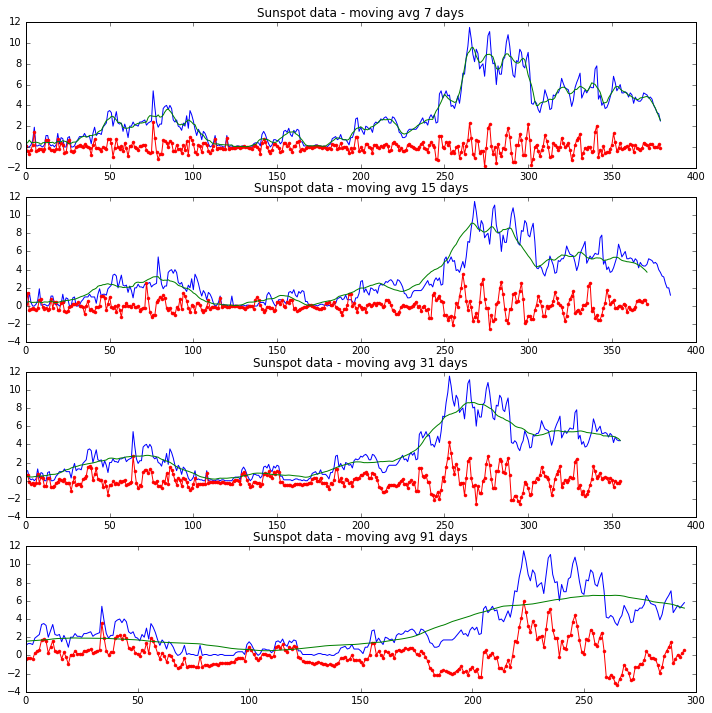

In [44]:
res0 = np.subtract(sunspot[3:-3,1],(pl.movavg(sunspot[:,1],7)))
res1 = np.subtract(sunspot[7:-7,1],(pl.movavg(sunspot[:,1],15)))
res2 = np.subtract(sunspot[15:-15,1],(pl.movavg(sunspot[:,1],31)))
res3 = np.subtract(sunspot[45:-45,1],(pl.movavg(sunspot[:,1],91)))

f, ax = plt.subplots(nrows=4, ncols=1, figsize=(12,12))

ax[0].plot(sunspot[3:-3,1], c='b', label='any')
ax[0].plot(res0, c='r', marker='.')
ax[0].plot(pl.movavg(sunspot[:,1],7), c='g')
ax[0].set_title('Sunspot data - moving avg 7 days')

ax[1].plot(sunspot[:,1])
ax[1].plot(res1, c='r', marker='.')
ax[1].plot(pl.movavg(sunspot[:,1],15), c='g')
ax[1].set_title('Sunspot data - moving avg 15 days')

ax[2].plot(sunspot[15:-15,1], c='b')
ax[2].plot(res2, c='r', marker='.')
ax[2].plot(pl.movavg(sunspot[:,1],31), c='g')
ax[2].set_title('Sunspot data - moving avg 31 days')

ax[3].plot(sunspot[45:-45,1], c='b')
ax[3].plot(res3, c='r', marker='.')
ax[3].plot(pl.movavg(sunspot[:,1],91), c='g')
ax[3].set_title('Sunspot data - moving avg 91 days')
plt.show()

Linear and Polynomial Regressions
---------------------------------
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html      
http://www.scipy.org/Cookbook/LinearRegression      
http://en.wikipedia.org/wiki/Linear_regression  
http://en.wikipedia.org/wiki/Polynomial_regression  

Using Pylab's linear regression

[ 2.3  0.5]
[ 2.8  5.1  7.4  9.7]


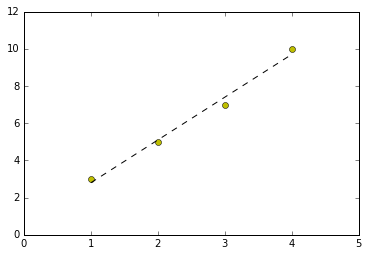

In [45]:
x = [1,2,3,4]
y = [3,5,7,10] # 10, not 9, so the fit isn't perfect

fit = pl.polyfit(x,y,1) # 1 is the degree of polynomial
fit_fn = pl.poly1d(fit) # fit_fn is now a function which takes in x and returns an estimate for y
print(fit)
print(fit_fn(x))
ax = plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.show()

Analysing the Boston Marathon results  
http://en.wikipedia.org/wiki/List_of_winners_of_the_Boston_Marathon

In [46]:
marathon_m = np.genfromtxt(os.path.join(datapath,dataset8), usecols=(0,4), delimiter=',')
marathon_w = np.genfromtxt(os.path.join(datapath,dataset8), usecols=(0,8), delimiter=',', skip_header=69)

In [47]:
t1 = np.linspace(1897,2014,len(marathon_m[:,0]))
t2 = np.linspace(1960,2014,len(marathon_w[:,0]))

In [48]:
s_m = pd.Series(marathon_m[:,1], index=marathon_m[:,0], name='Men')
s_w = pd.Series(marathon_w[:,1], index=marathon_w[:,0])
df_m_w = pd.concat([s_m,s_w], axis=1, keys=['Men','Women'])
df_m_w.tail()

,Men,Women
2010.0,125.866667,146.183333
2011.0,123.033333,142.600000
2012.0,132.666667,151.833333
2013.0,130.366667,146.416667
2014.0,128.616667,138.950000


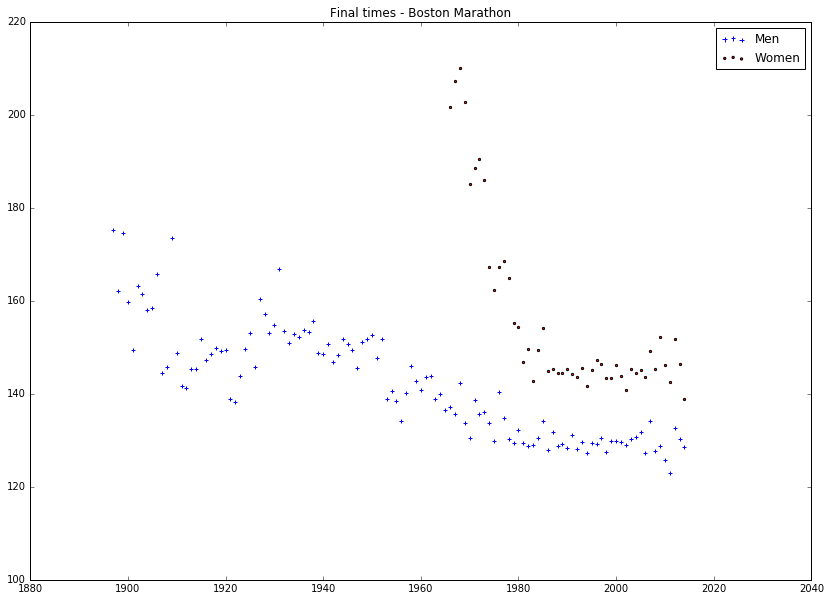

In [49]:
plt.figure(figsize=(14,10))
plt.scatter(marathon_m[:,0], marathon_m[:,1], c='b', marker='+')
plt.scatter(marathon_w[:,0], marathon_w[:,1], c='r', marker='.')
plt.title('Final times - Boston Marathon')
plt.legend(['Men','Women'])
plt.show()

Linear Regression

In [50]:
(a,b) = pl.polyfit(t1,marathon_m[:,1],1) 
xm_linear = pl.polyval([a,b],t1)
(a,b) = pl.polyfit(t2,marathon_w[:,1],1)
xf_linear = pl.polyval([a,b],t2)

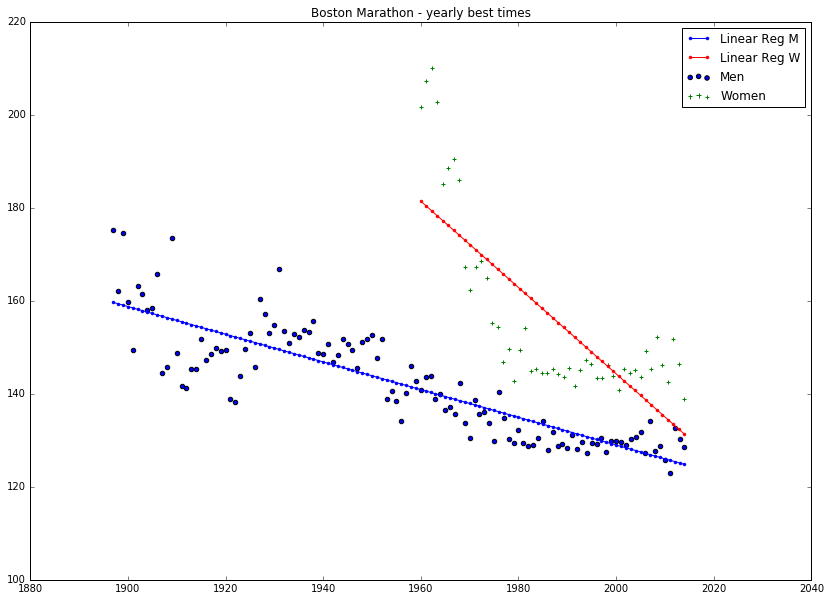

In [51]:
plt.figure(figsize=(14,10))
plt.title('Boston Marathon - yearly best times')
plt.scatter(t1, marathon_m[:,1], c='b', marker='o')
plt.scatter(t2, marathon_w[:,1], c='g', marker='+')
plt.plot(t1, xm_linear,'b.-')
plt.plot(t2, xf_linear,'r.-')
plt.legend(['Linear Reg M','Linear Reg W','Men','Women'], loc=0)
plt.show()

Regression with 2th order polynomial

In [52]:
(a,b,c) = pl.polyfit(t1,marathon_m[:,1],2)
xm_2th = pl.polyval([a,b,c],t1)
(a,b,c) = pl.polyfit(t2,marathon_w[:,1],2)
xw_2th = pl.polyval([a,b,c],t2)

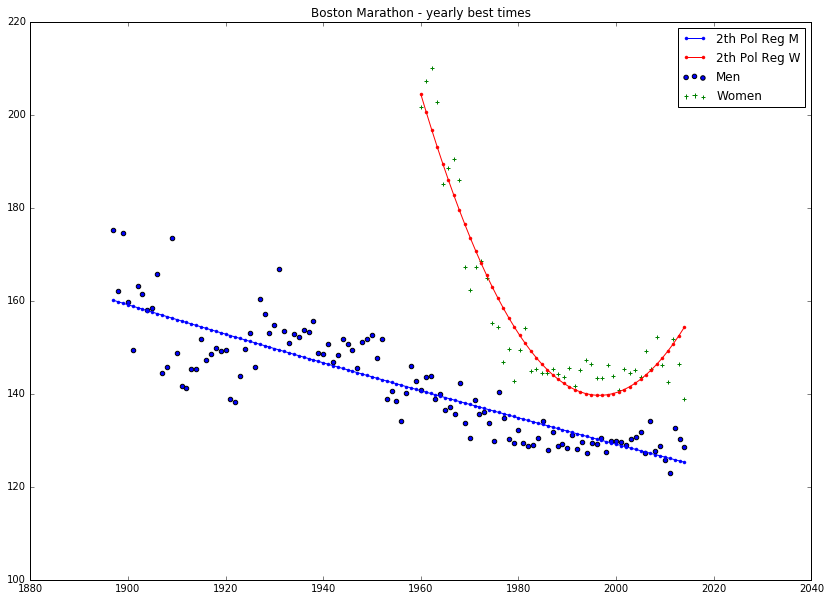

In [53]:
plt.figure(figsize=(14,10))
plt.title('Boston Marathon - yearly best times')
plt.scatter(t1, marathon_m[:,1], c='b', marker='o')
plt.scatter(t2, marathon_w[:,1], c='g', marker='+')
plt.plot(t1, xm_2th,'b.-')
plt.plot(t2, xw_2th,'r.-')
plt.legend(['2th Pol Reg M','2th Pol Reg W','Men','Women'], loc=0)
plt.show()

Regression with 3rd order polynomial

In [54]:
coefs_m = pl.polyfit(t1,marathon_m[:,1],3) 
xm_3th = pl.polyval(coefs_m,t1)
coefs_w = pl.polyfit(t2,marathon_w[:,1],3)
xw_3th = pl.polyval(coefs_w,t2)

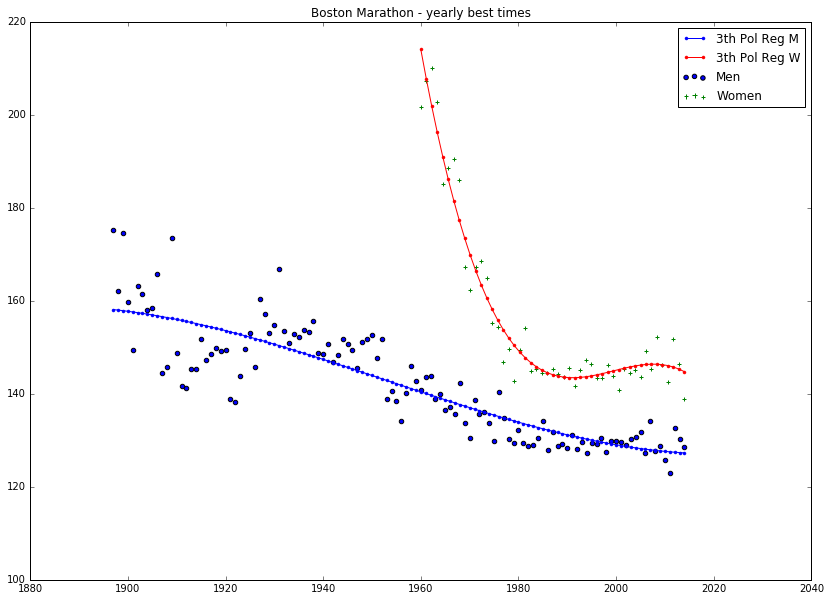

In [55]:
plt.figure(figsize=(14,10))
plt.title('Boston Marathon - yearly best times')
plt.scatter(t1, marathon_m[:,1], c='b', marker='o')
plt.scatter(t2, marathon_w[:,1], c='g', marker='+')
plt.plot(t1, xm_3th,'b.-')
plt.plot(t2, xw_3th,'r.-')
plt.legend(['3th Pol Reg M','3th Pol Reg W','Men','Women'], loc=0)
plt.show()

Regression with 4th order polynomial

In [56]:
coefs_m = pl.polyfit(t1,marathon_m[:,1],4) 
xm_4th = pl.polyval(coefs_m,t1)
coefs_w = pl.polyfit(t2,marathon_w[:,1],4)
xw_4th = pl.polyval(coefs_w,t2)

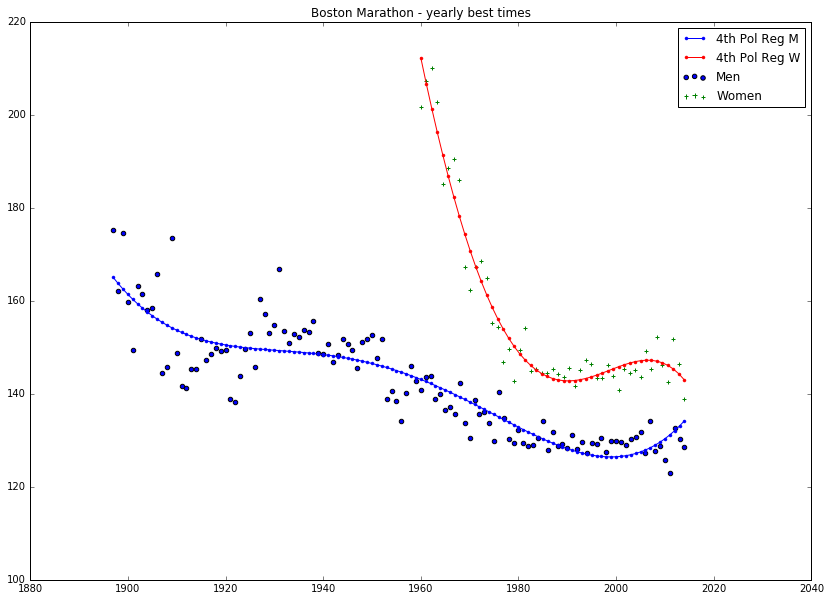

In [57]:
plt.figure(figsize=(14,10))
plt.title('Boston Marathon - yearly best times')
plt.scatter(t1, marathon_m[:,1], c='b', marker='o')
plt.scatter(t2, marathon_w[:,1], c='g', marker='+')
plt.plot(t1, xm_4th,'b.-')
plt.plot(t2, xw_4th,'r.-')
plt.legend(['4th Pol Reg M','4th Pol Reg W','Men','Women'], loc=0)
plt.show()

Linear regression in The Draft Lottery case:

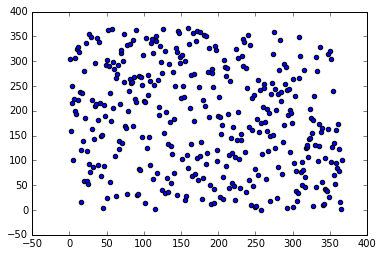

In [58]:
cotacoes = pd.read_csv(os.path.join(datapath,dataset9))
plt.scatter(lottery[:,0], lottery[:,1], c='b', marker='o')
plt.show()

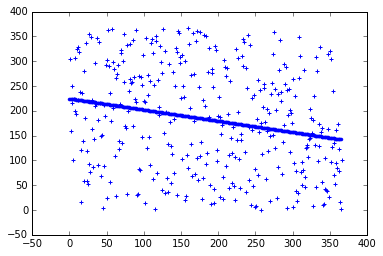

In [59]:
plt.scatter(lottery[:,0], lottery[:,1], c='b', marker='+')
t1 = np.linspace(0,365,len(lottery[:,0]))
(a,b) = pl.polyfit(t1,lottery[:,1],1) 
xm_linear = pl.polyval([a,b],t1)
plt.plot(t1, xm_linear,'b.-')
plt.show()

Be careful with regressions!  

http://matplotlib.org/1.2.1/examples/pylab_examples/anscombe.html  
    
Edward Tufte uses this example from Anscombe to show 4 datasets of x and y that have the same mean, standard deviation, and regression line, but which are qualitatively different.

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


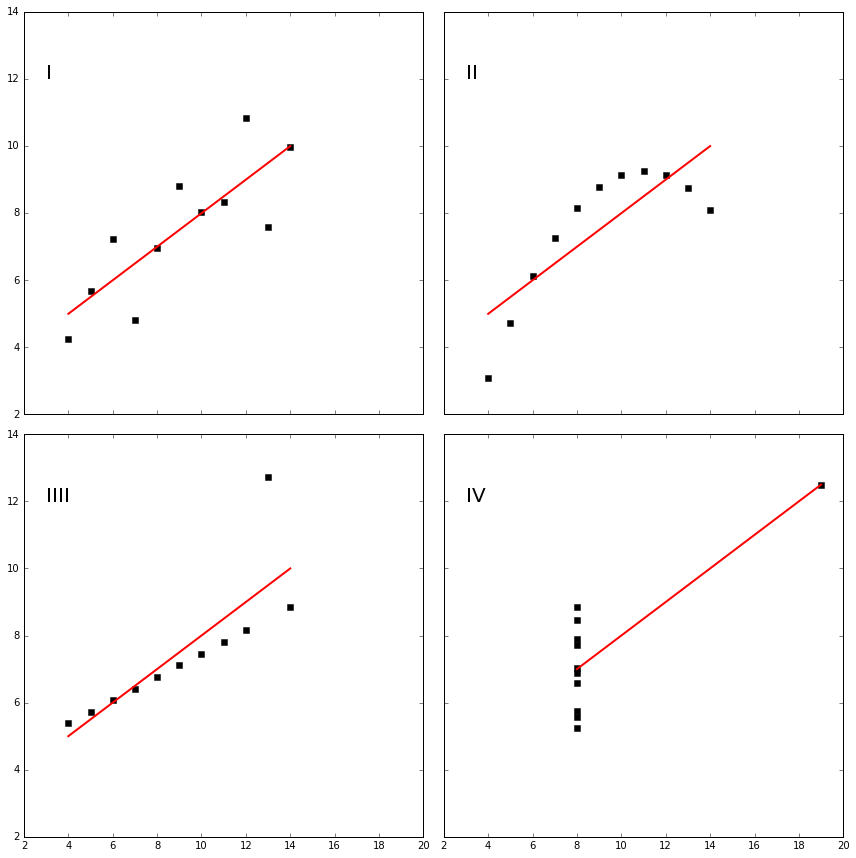

In [60]:
x =  np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8,8,8,8,8,8,8,19,8,8,8])
y4 = np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

def fit(x):
    return 3+0.5*x

plt.clf()
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12), sharex='col', sharey='row')

xfit = np.array([np.amin(x),np.amax(x)])
ax1.plot(x,y1,'ks', xfit, fit(xfit), 'r-', lw=2)
ax1.axis([2,20,2,14])
ax1.text(3,12, 'I', fontsize=20)

ax2.plot(x,y2,'ks', xfit, fit(xfit), 'r-', lw=2)
ax2.axis([2,20,2,14])
ax2.text(3,12, 'II', fontsize=20)

ax3.plot(x,y3,'ks', xfit, fit(xfit), 'r-', lw=2)
ax3.axis([2,20,2,14])
ax3.text(3,12, 'IIII', fontsize=20)

xfit = np.array([np.amin(x4),np.amax(x4)])
ax4.plot(x4,y4,'ks', xfit, fit(xfit), 'r-', lw=2)
ax4.axis([2,20,2,14])
ax4.text(3,12, 'IV', fontsize=20)

plt.tight_layout()

#verify the stats
pairs = (x,y1), (x,y2), (x,y3), (x4,y4)
for x,y in pairs:
    print('mean={:.2f}, std={:.2f}, r={:.2f}'.format(np.mean(y), np.std(y), np.corrcoef(x,y)[0][1]))
plt.show()

Exploring Bovespa stock prices

In [61]:
cotacoes = pd.read_csv(os.path.join(datapath,dataset9))
print(cotacoes.shape)
cotacoes.head()

(4513, 7)


,Date,Open,High,Low,Close,Volume,Adj Close
0,2011-07-25,60264.0,60285.0,59640.0,59971.0,1772400,59971.0
1,2011-07-22,60263.0,60696.0,60077.0,60270.0,1809600,60270.0
2,2011-07-21,59120.0,60441.0,59120.0,60263.0,2159600,60263.0
3,2011-07-20,59094.0,59552.0,59045.0,59120.0,1946000,59120.0
4,2011-07-19,58838.0,59394.0,58677.0,59082.0,1888000,59082.0


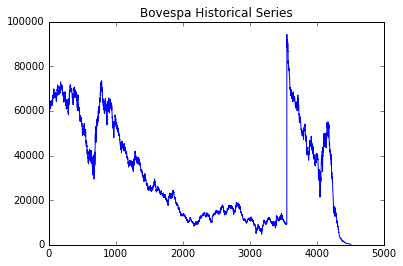

In [62]:
plt.plot(cotacoes['Open'])
plt.title('Bovespa Historical Series')
plt.show()

We can see there is a great scale change... maybe it's a good idea to treat as two separate series

In [63]:
cotacoes.index

RangeIndex(start=0, stop=4513, step=1)

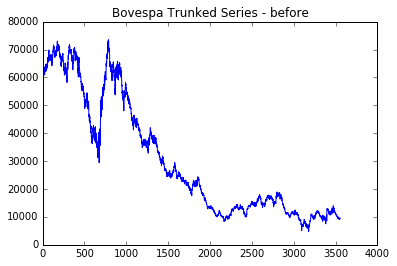

In [92]:
cotacoes_before = cotacoes.ix[0:3554,1].values
plt.figure(2)
plt.title('Bovespa Trunked Series - before')
plt.plot(cotacoes_before)
plt.show()

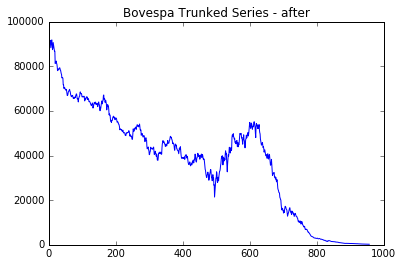

In [94]:
cotacoes_after = cotacoes.ix[3555:,1].values
plt.figure(3)
plt.title('Bovespa Trunked Series - after')
plt.plot(cotacoes_after)
plt.show()

Applying smoothing, as before, with windows varying its size:

Smoothing with a gaussian filter
--------------------------------
1) Building a gaussian filter with 31 points and standard deviation of $\sigma$

http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.gaussian.html

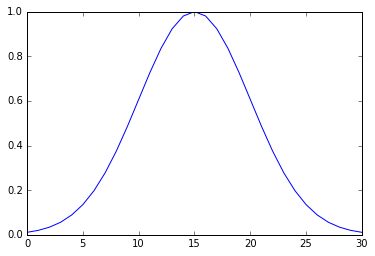

In [95]:
filt = signal.gaussian(31, 5)
plt.plot(filt)
plt.show()

2) Normalizing the filter dividing by the sum of the elements

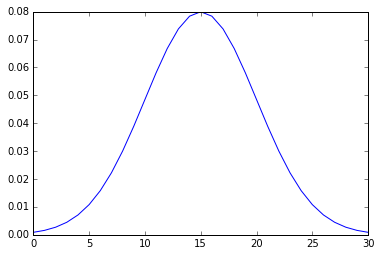

In [96]:
filt /= sum(filt)
plt.plot(filt)
plt.show()

3) Convoluting the serie with the filter  
4) Comparing the series (original, moving averages and Gaussian smoothed)

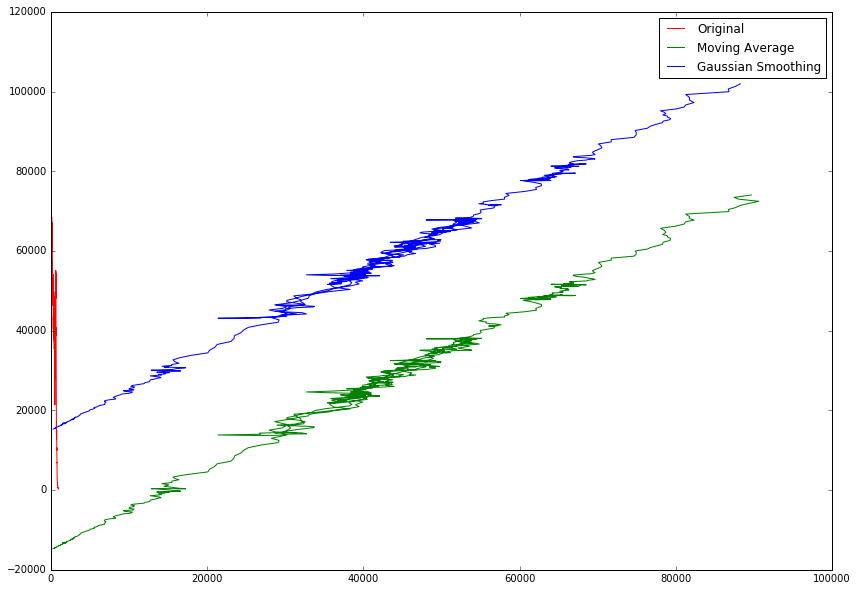

In [103]:
cotacoes_after_Gsmooth = pl.convolve(cotacoes_after, filt, mode='valid')
offset = 15000

plt.figure(figsize=(14,10))
plt.plot(cotacoes_after, 'r')
plt.plot(cotacoes_after[10:-10], pl.movavg(cotacoes_after[:]-offset,21), 'g')
plt.plot(cotacoes_after[15:-15], cot_after_Gsmooth+offset, 'b')

plt.legend(['Original','Moving Average','Gaussian Smoothing'], loc=0)
plt.show()

Calculating Cross-Correlation  
http://en.wikipedia.org/wiki/Cross-correlation  
http://stackoverflow.com/questions/15989384/cross-correlation-of-non-periodic-function-with-numpy  

In [ ]:
x = np.linspace(-15, 15, 4000)
f1 = (np.arctan(-x) + np.pi/2) / np.pi
f2 = (np.arctan(-x + 4) + np.pi/2) / np.pi
plt.plot(x,f1)
plt.plot(x,f2)
plt.show()

In [ ]:
L4 = int(len(f2)/8)
sf2 = f2[L4:-L4]
c = pl.correlate(f1-np.mean(f1), sf2-np.mean(f1), 'same')
print("peak correlation occurs at:", x[np.argmax(c)])  # -3.7471867967
plt.plot(x,c)
plt.show()

In [ ]:
# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv(os.path.join(datapath, "Iris.csv"))
# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()

In [ ]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

In [ ]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

In [ ]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

In [ ]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

In [ ]:
iris.head()

In [ ]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

In [ ]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

In [ ]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

In [ ]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

In [ ]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

In [ ]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

In [ ]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

In [ ]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

In [ ]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

In [ ]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")